In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import imread
import seaborn as sns
import spacy
from wordcloud import WordCloud
import string
import re

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
path=r"Elon_musk.csv"

In [4]:
tweet=pd.read_csv(path, encoding='latin-1',)
tweet

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [5]:
tweet=tweet.drop('Unnamed: 0',axis=1)

In [6]:
tweet

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
tweet=[Text.strip() for Text in tweet.Text]

In [8]:
tweet=[Text for Text in tweet if Text]

In [9]:
tweet

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [10]:
text=' '.join(tweet)

In [11]:
print(text)

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923

In [12]:
no_punc_text=text.translate(str.maketrans(' ',' ',string.punctuation))

In [13]:
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [14]:
from nltk.tokenize import word_tokenize

In [15]:
text_tokens=word_tokenize(no_punc_text)

In [16]:
print(text_tokens[0:50])

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo']


In [17]:
len(text_tokens)

21078

In [18]:
import nltk

In [19]:
from nltk.corpus import stopwords

In [20]:
from nltk.stem import PorterStemmer

In [21]:
from nltk.stem import WordNetLemmatizer

In [22]:
my_stop_words=stopwords.words('english')

In [23]:
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
my_stop_words.append('the')

In [25]:
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]

In [26]:
print(no_stop_tokens[0:40])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


In [27]:
lower_words=[x.lower() for x in no_stop_tokens]

In [28]:
print(lower_words[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail']


In [29]:
stemmer=PorterStemmer()

In [30]:
stemmed_tokens=[stemmer.stem(word) for word in lower_words]

In [31]:
print(stemmed_tokens[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail']


In [32]:
nlp=spacy.load('en_core_web_sm')

In [33]:
doc=nlp(' '.join(no_stop_tokens))

In [34]:
print(doc[0:40])

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail


In [35]:
lemmas=[token.lemma_ for token in doc]

In [36]:
print(lemmas[0:40])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail']


In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
vectorizer=CountVectorizer()

In [39]:
X=vectorizer.fit_transform(lemmas)

In [40]:
print(vectorizer.vocabulary_)

{'kunalb11': 2706, 'alien': 232, 'idaacarmack': 2443, 'ray': 3620, 'trace': 4495, 'cyberpunk': 967, 'hdr': 1680, 'nextlevel': 3157, 'have': 1674, 'try': 4529, 'joerogan': 2625, 'spotify': 4113, 'great': 1614, 'interview': 2554, 'gtera27': 1633, 'doge': 1120, 'underestimate': 4663, 'teslacn': 4341, 'congratulations': 861, 'tesla': 4335, 'china': 745, 'amazing': 258, 'execution': 1329, 'last': 2726, 'year': 4938, 'now': 3195, 'next': 3156, 'even': 1301, 'happy': 1661, 'new': 3153, 'ox': 3310, 'httpstco9wfkmyu2oj': 1868, 'frodo': 1496, 'underdoge': 4662, 'all': 235, 'thought': 4419, 'would': 4914, 'fail': 1365, 'pron': 3540, 'httpstcozgxjfdzzrm': 2401, 'owensparks': 3307, 'flcnhvy': 1438, 'anonyx10': 287, 'haha': 1647, 'thank': 4378, 'indeed': 2492, 'tweets': 4553, 'definitely': 1022, 'represent': 3702, 'realworld': 3645, 'time': 4438, 'allocation': 237, 'the': 4386, 'entertaining': 1257, 'outcome': 3287, 'likely': 2786, 'givedirectly': 1581, 'just': 2653, 'send': 3888, 'agree': 201, 'clu

In [41]:
print(vectorizer.get_feature_names()[50:100])

['23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th']


In [42]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
print(X.toarray().shape)

(15795, 4969)


In [44]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)

In [45]:
bow_matrix_ngram=vectorizer_ngram_range.fit_transform(tweet)

In [46]:
print(vectorizer_ngram_range.get_feature_names())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']


In [47]:
print(bow_matrix_ngram)

  (0, 6)	1
  (1, 33)	1
  (1, 57)	1
  (1, 94)	1
  (1, 37)	1
  (1, 28)	1
  (1, 99)	1
  (1, 38)	1
  (2, 25)	1
  (3, 37)	1
  (4, 57)	1
  (4, 75)	1
  (4, 22)	2
  (4, 97)	1
  (4, 85)	1
  (4, 80)	1
  (4, 45)	1
  (5, 97)	1
  (5, 80)	1
  (5, 52)	1
  (5, 55)	1
  (5, 31)	1
  (5, 16)	1
  (5, 56)	1
  (5, 32)	1
  :	:
  (1994, 37)	1
  (1994, 38)	1
  (1994, 85)	1
  (1994, 80)	1
  (1994, 31)	1
  (1994, 16)	1
  (1994, 32)	1
  (1994, 3)	1
  (1994, 21)	1
  (1994, 70)	1
  (1994, 12)	1
  (1994, 87)	1
  (1994, 5)	1
  (1994, 35)	1
  (1994, 81)	1
  (1994, 61)	1
  (1995, 85)	1
  (1995, 5)	1
  (1995, 74)	1
  (1995, 43)	1
  (1995, 63)	1
  (1996, 63)	1
  (1997, 37)	1
  (1997, 7)	1
  (1997, 63)	1


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
vectorizer_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)

In [50]:
tf_idx_matrix_n_gram_max_features=vectorizer_ngram_max_features.fit_transform(tweet)

In [51]:
print(vectorizer_ngram_max_features.get_feature_names())

['0001f525', '0001f5a4', '0001f923', '0001f923 0001f923', '20', '28delayslater', '60', 'about', 'absolutely', 'accurate', 'actually', 'after', 'ai', 'ajtourville', 'all', 'almost', 'also', 'although', 'am', 'amazing', 'amp', 'an', 'and', 'any', 'appreciated', 'archillect', 'are', 'as', 'astro_doug', 'astrobehnken', 'astrojordy', 'astronauts', 'at', 'at tesla', 'austinbarnard45', 'autopilot', 'back', 'bad', 'bar', 'be', 'be great', 'been', 'being', 'berlin', 'berniesanders', 'best', 'beta', 'better', 'between', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'both', 'build', 'but', 'but it', 'but we', 'by', 'c_bass3d', 'can', 'car', 'cargo', 'cars', 'cleantechnica', 'close', 'co', 'come', 'coming', 'coming soon', 'companies', 'confirmed', 'congratulations', 'cool', 'cost', 'could', 'crew', 'crew dragon', 'day', 'days', 'definitely', 'design', 'did', 'different', 'djsnm', 'dmc_ryan', 'do', 'does', 'doesn', 'doge', 'doing', 'dojo', 'don', 'done', 'down', 'dragon'

In [52]:
print(tf_idx_matrix_n_gram_max_features.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.89309813 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [53]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

In [54]:
from nltk.corpus import stopwords

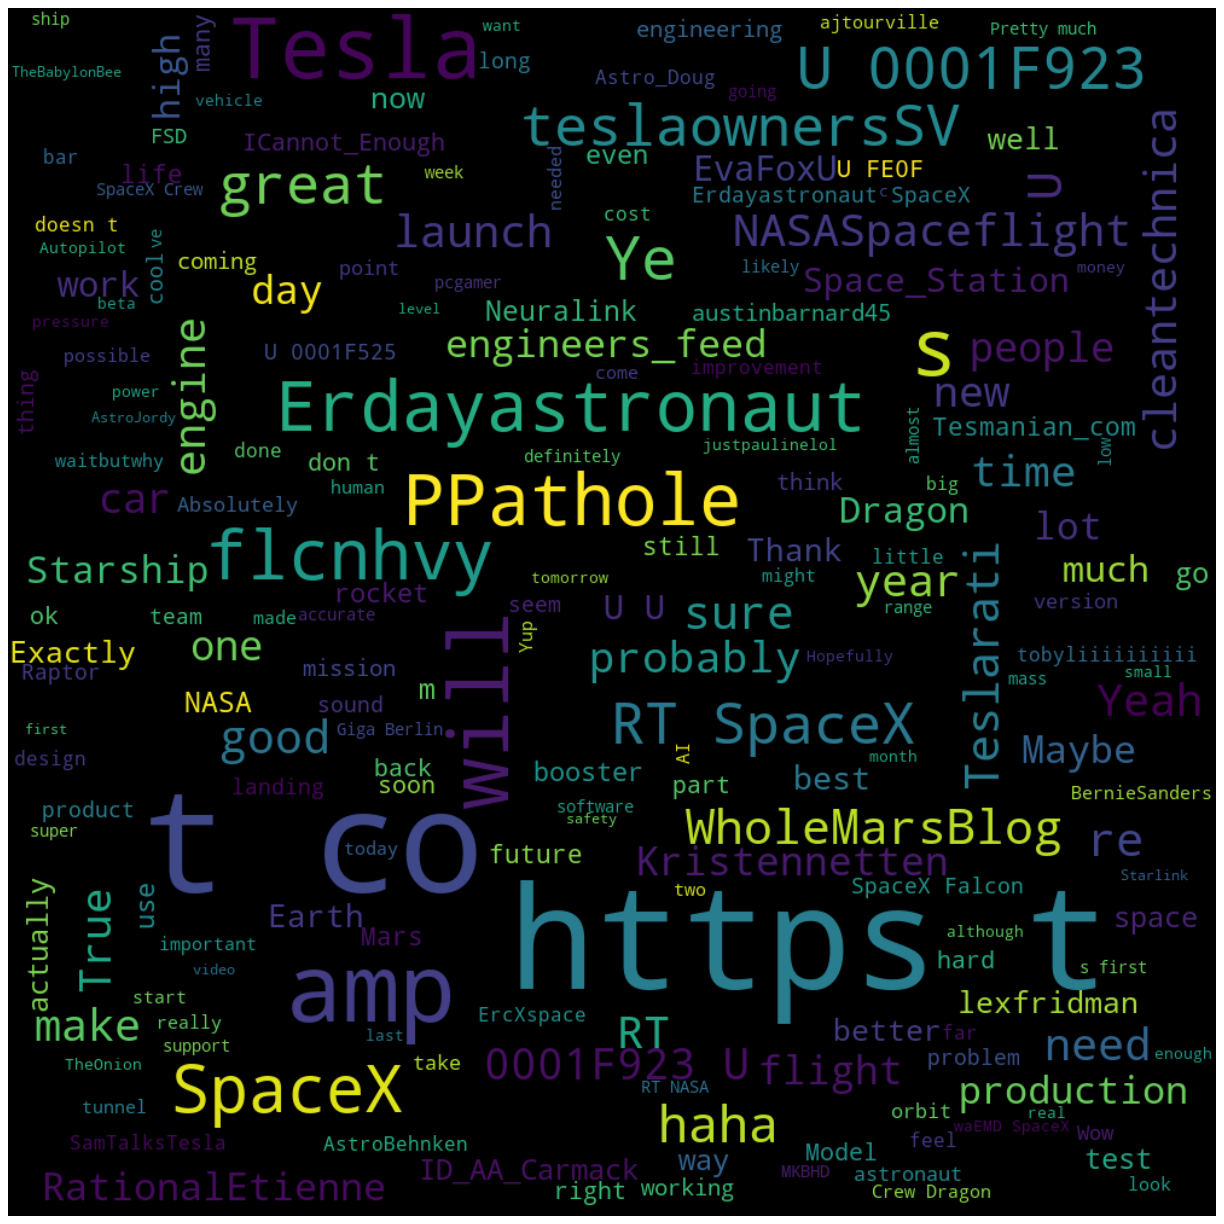

In [55]:
allwords = " ".join([words for words in tweet])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [56]:
wordCloud.to_file('wordcloud.png')

In [57]:
path=r"Elon_musk.csv"
tweet1=pd.read_csv(path, encoding='latin-1',)
tweet1

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [58]:
tweet1=tweet1.drop('Unnamed: 0',axis=1)
tweet1

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [59]:
tweet1=[Text.strip() for Text in tweet1.Text]

In [60]:
tweet1

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [61]:
tweet1=' '.join(tweet1)

In [62]:
tweet1

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [63]:
from nltk import tokenize

In [64]:
sentence=tokenize.sent_tokenize(tweet1)

In [66]:
df=pd.DataFrame(sentence,columns=['sentence'])

In [67]:
df.head(40)

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
5,Happy New Year of the Ox!
6,https://t.co/9WFKMYu2oj Frodo was the underdog...
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...
8,Tweets definitely do not represent real-world ...
9,The most entertaining outcome is the most like...


In [68]:
path=r"Afinn.csv"

In [69]:
afinn=pd.read_csv(path,encoding='cp1252')

In [70]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [71]:
affinity_score=afinn.set_index('word')['value'].to_dict()

In [72]:
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [73]:
#importing the spacy package

import en_core_web_sm

In [74]:
nlp=en_core_web_sm.load()

In [75]:
affinity_lexicons=affinity_score

In [76]:
def sentiment_analysis(text: str=None):
    sent_score=0
    
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score += affinity_lexicons.get(word.lemma_,0)
            
    return sent_score

In [77]:
df['sentence_value']= df['sentence'].apply(sentiment_analysis)

In [78]:
df

,sentence,sentence_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [79]:
df['word count']=df['sentence'].str.split().apply(len)

In [80]:
df

,sentence,sentence_value,word count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [81]:
df.sort_values(by='sentence_value').head(50)

,sentence,sentence_value,word count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61
611,"Then static fire, checkouts, static fire, fly ...",-4,12
920,"It may never pay out, as the stock cant b ht...",-4,31
680,"Occasional flights from land are ok, but frequ...",-4,39
90,All three static fires completed &amp; no RUDs!,-3,8
436,@SpaceX Just a small-seeming issue with loss o...,-3,11
718,That bs has been pushed by Eberhard (worst per...,-3,25
481,Pretty odd https://t.co/PPSorKWdI8 @enn_nafnl...,-3,79


In [83]:
df[df['sentence_value']<=0]

,sentence,sentence_value,word count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [84]:
df[df['sentence_value']>10]

,sentence,sentence_value,word count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
42,"@thejackbeyer @NASASpaceflight Cryoproof, then...",12,84
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
159,@harsimranbansal @heydave7 It will most likely...,11,93
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
224,"@PPathole @karpathy For a second there, I thou...",11,69
258,@TheOnion @ID_AA_Carmack Yup @flcnhvy Change o...,11,57
569,@WholeMarsBlog Haha true @oneandonlyheady Mayb...,11,68
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentence_value', ylabel='Density'>

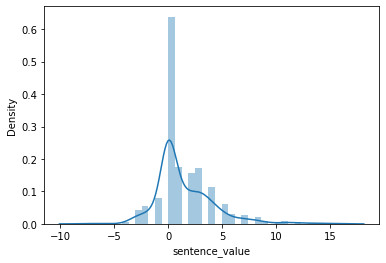

In [85]:
sns.distplot(df['sentence_value'])

In [86]:
df['index']= df.index

<AxesSubplot:xlabel='index', ylabel='sentence_value'>

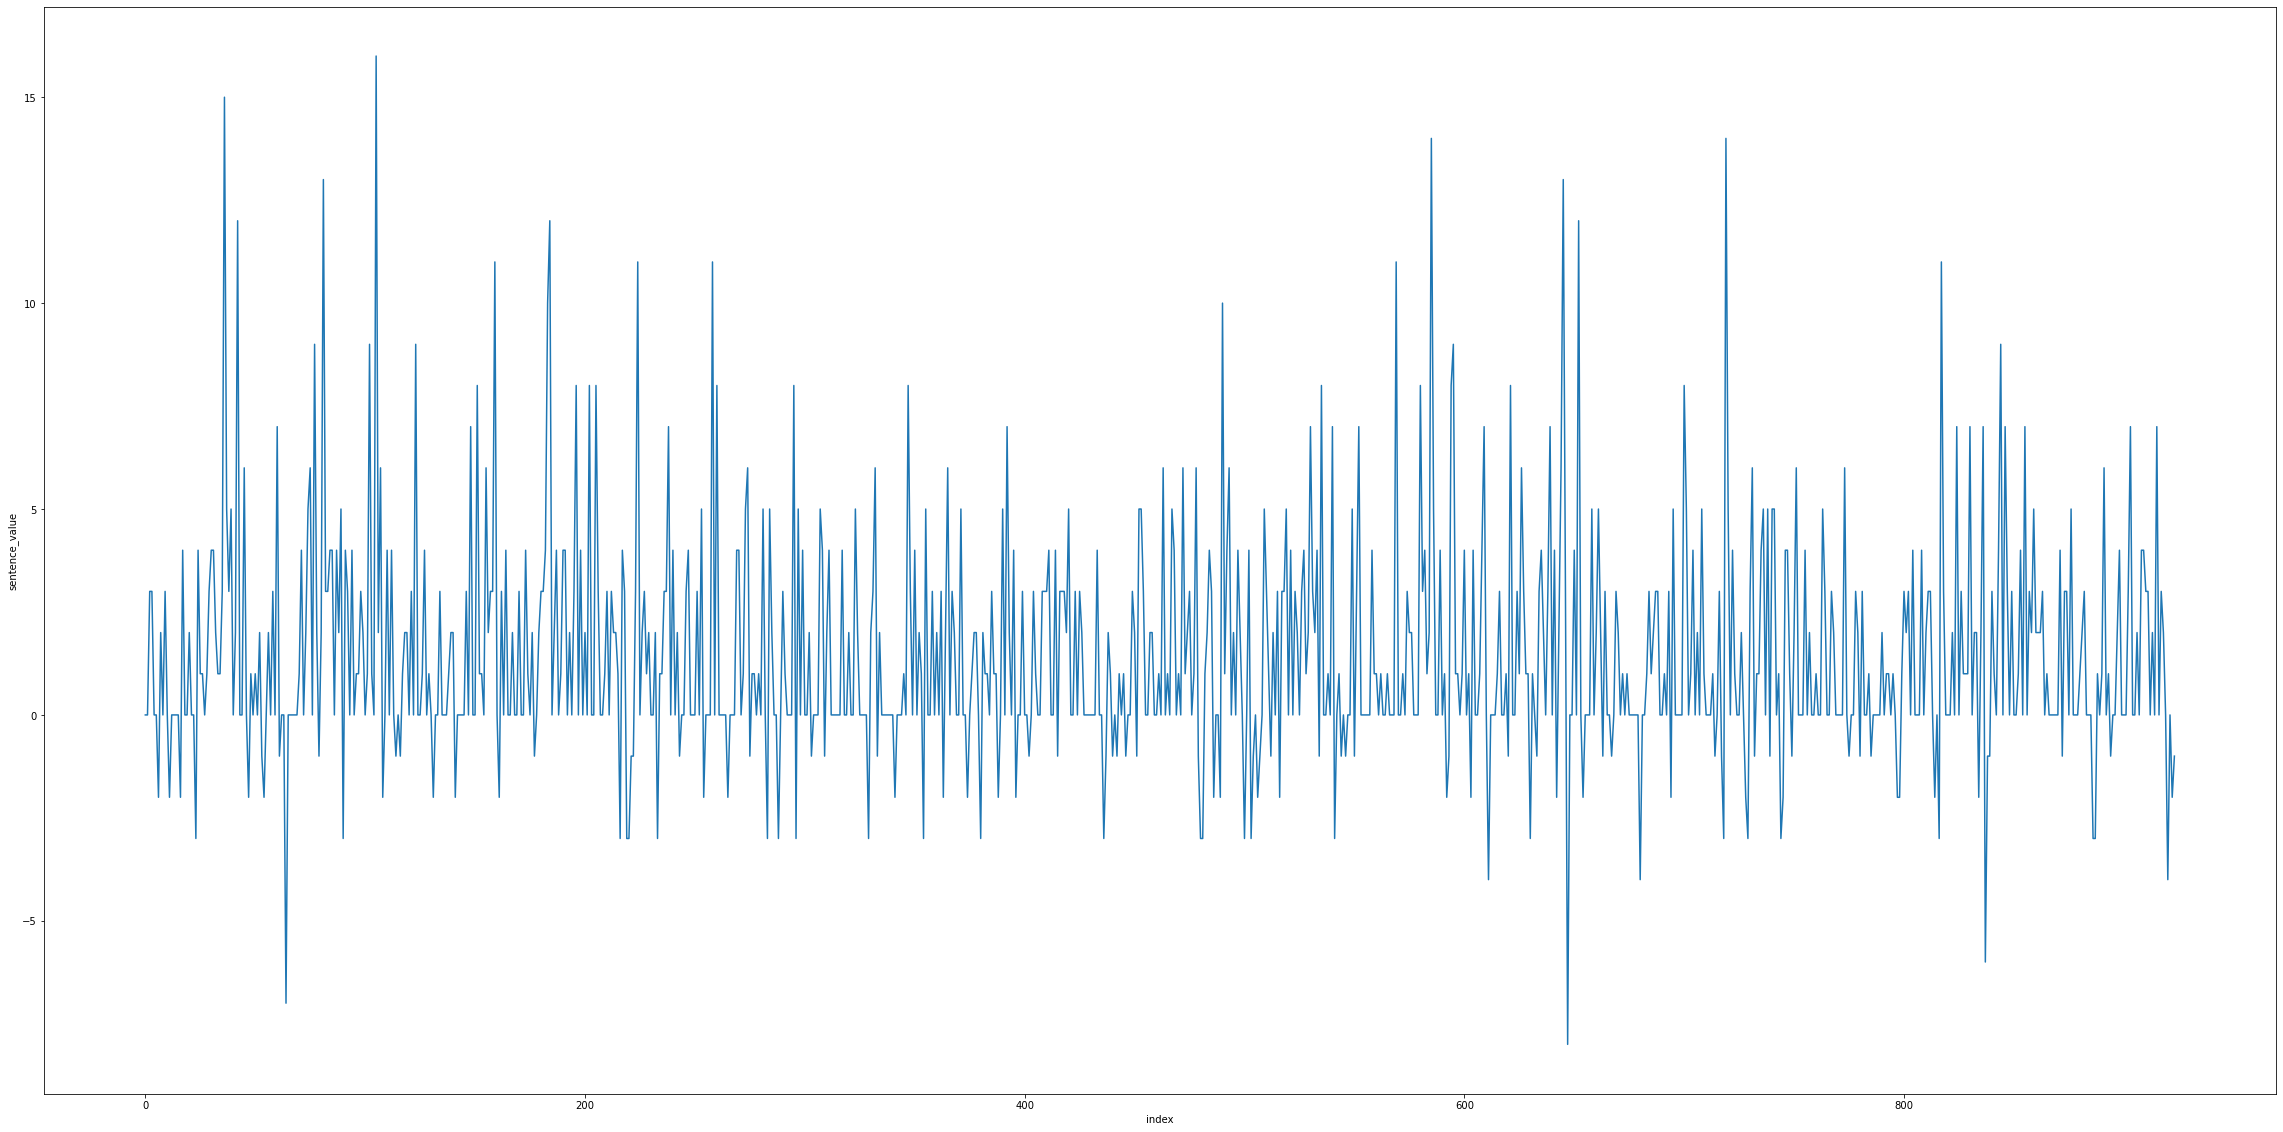

In [88]:
#plotting the line plot
plt.figure(figsize=[40,20])
sns.lineplot(y='sentence_value', x='index', data= df)

<AxesSubplot:title={'center':'sentiment analysis of the elon musk tweets'}, xlabel='word count', ylabel='sentence_value'>

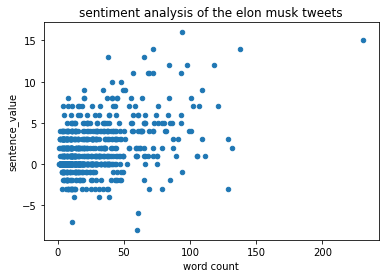

In [89]:
df.plot.scatter(y='sentence_value', x= 'word count',title='sentiment analysis of the elon musk tweets')

In [90]:
df.sentence_value.value_counts()

 0     363
 1      99
 3      98
 2      89
 4      65
-1      46
 5      35
-2      32
-3      25
 6      17
 7      16
 8      12
 9       5
 11      5
 12      3
-4       3
 13      2
 10      2
 14      2
 15      1
-7       1
 16      1
-8       1
-6       1
Name: sentence_value, dtype: int64